In [1]:
import torch
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Uniform Distribution Transformation
1. $X \sim \text{Uniform}(a, b)$
2. Transformation: $Y = X^2$
3. Goal: Find the PDF of $Y$

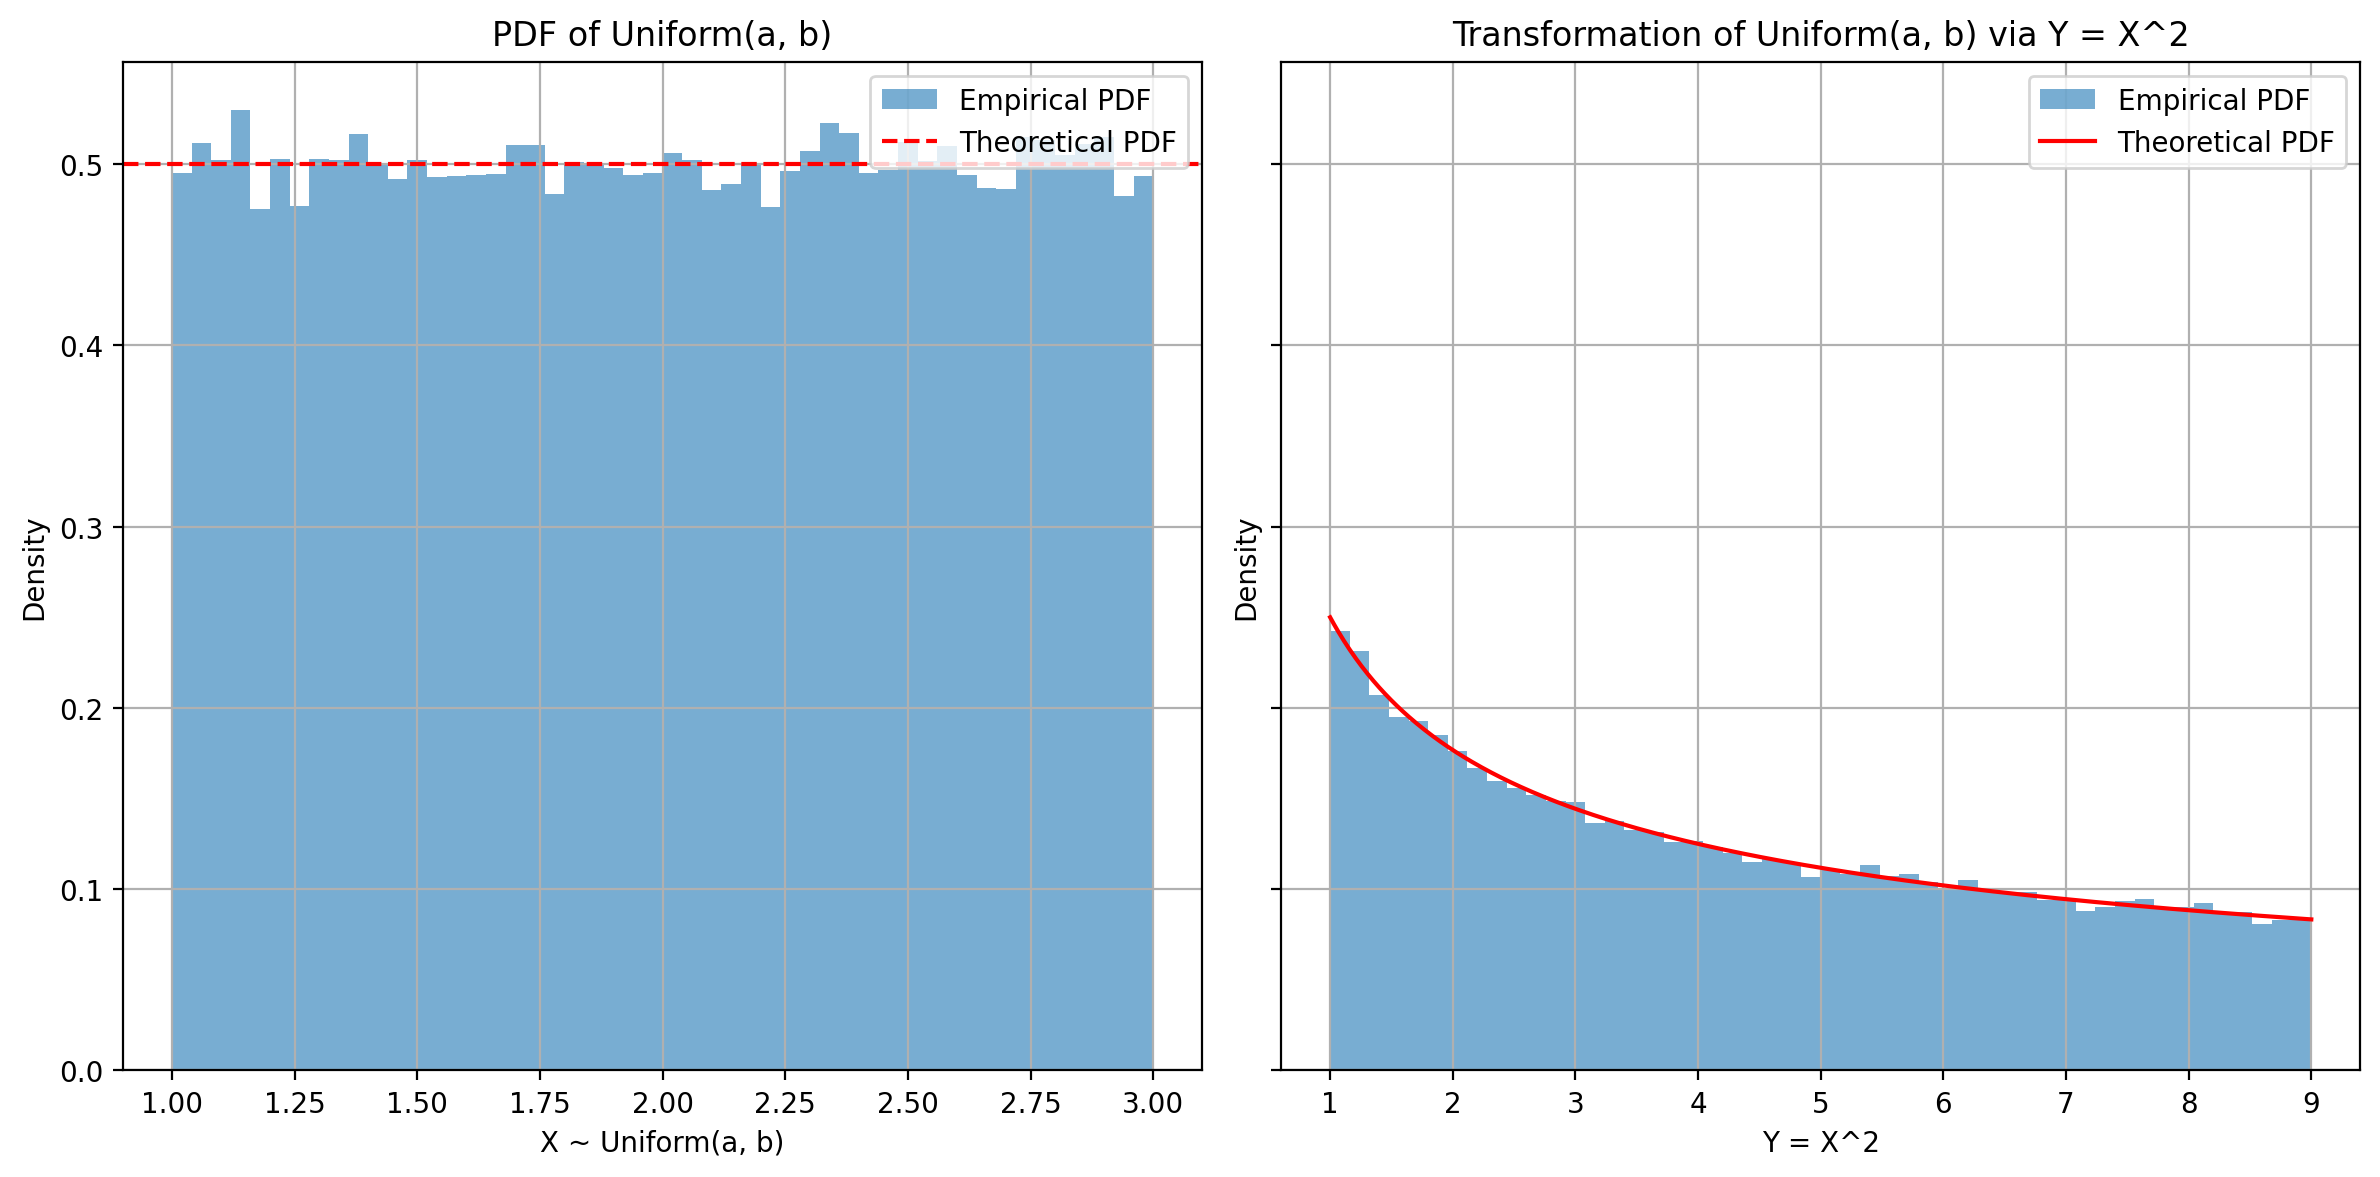

In [6]:
a, b = 1, 3
num_samples = 100000

uniform_dist = torch.distributions.Uniform(a, b)
X_samples = uniform_dist.sample((num_samples,))

Y_samples = X_samples ** 2

y_values = torch.linspace(a**2, b**2, 500)
f_Y = 1 / (2 * torch.sqrt(y_values) * (b - a))

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].hist(X_samples.numpy(), bins=50, density=True, alpha=0.6, label="Empirical PDF")
axes[0].axhline(1 / (b - a), color='r', linestyle='--', label="Theoretical PDF")
axes[0].set_xlabel("X ~ Uniform(a, b)")
axes[0].set_ylabel("Density")
axes[0].set_title("PDF of Uniform(a, b)")
axes[0].legend()
axes[0].grid()

axes[1].hist(Y_samples.numpy(), bins=50, density=True, alpha=0.6, label="Empirical PDF")
axes[1].plot(y_values.numpy(), f_Y.numpy(), 'r-', label="Theoretical PDF")
axes[1].set_xlabel("Y = X^2")
axes[1].set_ylabel("Density")
axes[1].set_title("Transformation of Uniform(a, b) via Y = X^2")
axes[1].legend()
axes[1].grid()
plt.tight_layout()
plt.show()



$Y = X^2 \Rightarrow X = \sqrt{Y}$ or $X = -\sqrt{Y}$  
Since $X \in [a, b]$ and $a > 0$, only the **positive root** is valid.

$$
f_Y(y) = f_X(x(y)) \cdot \left|\frac{dx}{dy}\right| = f_X(\sqrt{y}) \cdot \frac{1}{2\sqrt{y}}
$$
And since $f_X(x) = \frac{1}{b - a}$ (for uniform),

$$
f_Y(y) = \frac{1}{b - a} \cdot \frac{1}{2\sqrt{y}}, \quad \text{for } y \in [a^2, b^2]
$$

$$
f_Y(y) = \frac{1}{2(b - a)\sqrt{y}}, \quad y \in [a^2, b^2]
$$

# Gaussian Transformation
1. **Sample from a standard Gaussian** $X \sim \mathcal{N}(0, 1)$
2. Transform it via $Y = \mu + \sigma X \Rightarrow Y \sim \mathcal{N}(\mu, \sigma^2)$
3. Plot histogram of $Y$

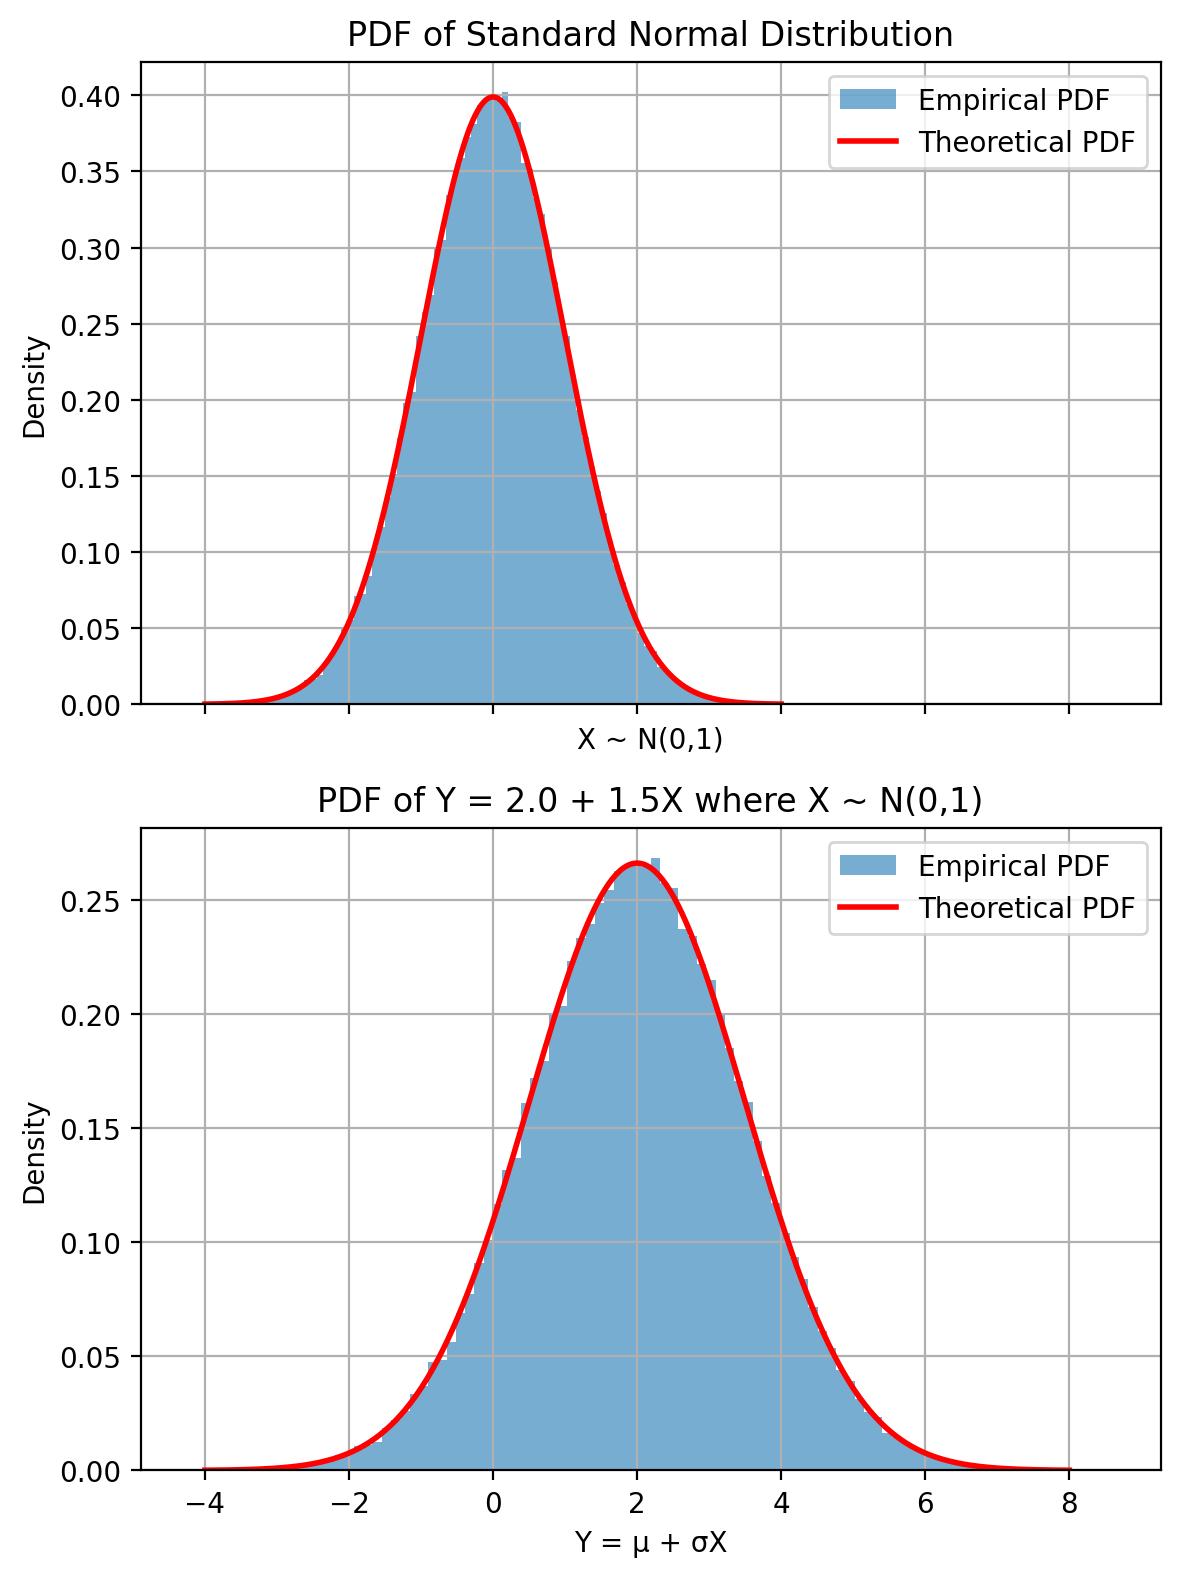

In [9]:
mu = 2.0
sigma = 1.5
num_samples = 100_000

standard_normal = torch.distributions.Normal(0.0, 1.0)
X = standard_normal.sample((num_samples,))

Y = mu + sigma * X

y_vals = torch.linspace(mu - 4*sigma, mu + 4*sigma, 500)
pdf_y = (1 / (sigma * torch.sqrt(torch.tensor(2 * torch.pi)))) * \
         torch.exp(-((y_vals - mu)**2) / (2 * sigma**2))

fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

axes[0].hist(X.numpy(), bins=100, density=True, alpha=0.6, label="Empirical PDF")
x_vals = torch.linspace(-4, 4, 500)
pdf_x = (1 / torch.sqrt(torch.tensor(2 * torch.pi))) * torch.exp(-0.5 * x_vals**2)
axes[0].plot(x_vals.numpy(), pdf_x.numpy(), 'r-', linewidth=2, label="Theoretical PDF")
axes[0].set_xlabel("X ~ N(0,1)")
axes[0].set_ylabel("Density")
axes[0].set_title("PDF of Standard Normal Distribution")
axes[0].legend()
axes[0].grid()

axes[1].hist(Y.numpy(), bins=100, density=True, alpha=0.6, label="Empirical PDF")
axes[1].plot(y_vals.numpy(), pdf_y.numpy(), 'r-', linewidth=2, label="Theoretical PDF")
axes[1].set_xlabel("Y = μ + σX")
axes[1].set_ylabel("Density")
axes[1].set_title(f"PDF of Y = {mu} + {sigma}X where X ~ N(0,1)")
axes[1].legend()
axes[1].grid()
plt.tight_layout()
plt.show()

## Exponentional RV  
$$
f_X(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$

$$
F_X(x) = 1 - e^{-\lambda x}
$$

$$
F_X^{-1}(u) = -\frac{\ln(1 - u)}{\lambda}
$$

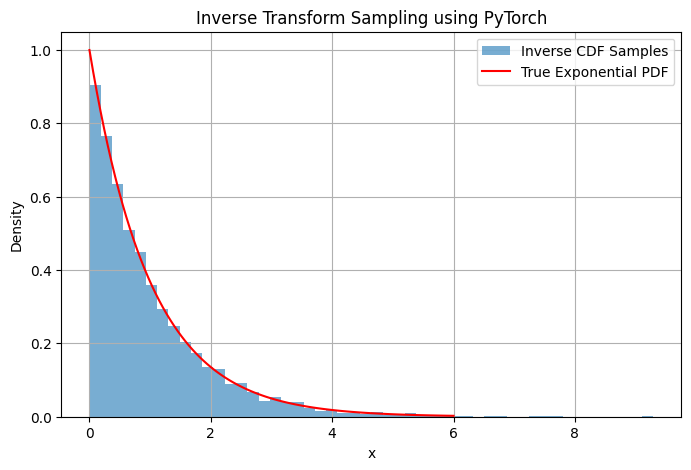

In [6]:
lambda_ = 1.0
n_samples = 10000

# Sample from Uniform(0,1)
u = torch.rand(n_samples)

# Apply inverse CDF of exponential
samples = -torch.log(1 - u) / lambda_

# True distribution using torch.distributions
exp_dist = torch.distributions.Exponential(rate=lambda_)

x_vals = torch.linspace(0, 6, 100)
pdf_vals = exp_dist.log_prob(x_vals).exp()  # f_X(x) = λ e^(-λx)

plt.figure(figsize=(8, 5))
plt.hist(samples.numpy(), bins=50, density=True, alpha=0.6, label="Inverse CDF Samples")
plt.plot(x_vals.numpy(), pdf_vals.numpy(), 'r-', label="True Exponential PDF")
plt.title("Inverse Transform Sampling using PyTorch")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
